In [1]:
%matplotlib inline
!pip install nengo
!pip install nengo_extras
import matplotlib.pyplot as plt

import nengo
import nengo_extras
from nengo.processes import Piecewise

#Check out these tutorials here
#https://www.nengo.ai/nengo/examples/dynamics/oscillator.html
#https://www.nengo.ai/nengo-extras/examples/plot_spikes.html
from nengo_extras.plot_spikes import (
    cluster, merge, plot_spikes, preprocess_spikes, sample_by_variance)


In [2]:
model = nengo.Network(label='Oscillator')
with model:
    # Create the ensemble for the oscillator
    neurons = nengo.Ensemble(200, dimensions=2)

In [3]:
with model:
    #YOUR CODE HERE 
    # Create an input signal
    input = nengo.Node(Piecewise({0: [1,0], .1: [0, 0]})) #vector [1, 0] at time zero, start with left stimulus for .1 duration
    
    # Connect the input signal to the neural ensemble
    nengo.Connection(input, neurons) #input from brain to motor control neurons
    
    # Create the a feedback connection Start with a value of [1, 1], [-1, 1] for the transform, see #https://www.nengo.ai/nengo/examples/dynamics/oscillator.html
    # After trying [1, 1], [-1, 1] try making plots for all positive connections. What if they are all zeros?
    transform1 = [[1, 1], [-1, 1]]
    nengo.Connection(neurons, neurons, transform=transform1, synapse=.1)

In [4]:
with model:
    #YOUR CODE HERE Create probes to monitor simulated neurons
    # Probe input signal
    input_probe = nengo.Probe(input, 'output')
    
    # Probe neurons using 'decoded_output' and a synapse value around 0.1, see #https://www.nengo.ai/nengo/examples/dynamics/oscillator.html
    neuron_probe = nengo.Probe(neurons, 'decoded_output', synapse=.1)
    
    # Probe spike data of neuron population, see #https://www.nengo.ai/nengo-extras/examples/plot_spikes.html
    spikes_probe = nengo.Probe(neurons.neurons, 'spikes')

In [5]:
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

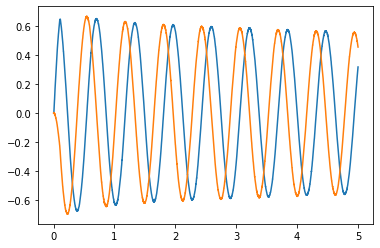

In [6]:
# YOUR CODE HERE
# plot the value of the decoded_output of neurons, see #https://www.nengo.ai/nengo/examples/dynamics/oscillator.html
plt.figure()
plt.plot(sim.trange(), sim.data[neuron_probe])
# What happens if you rerun the simulation using only positive feedback connections?
# What happens if you rerun the simulation and the feedback connections are zero?

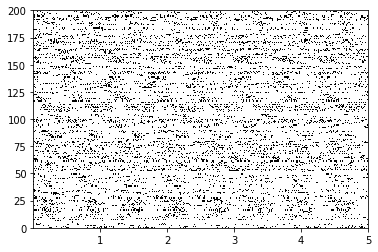

In [7]:
# YOUR CODE HERE
# plot the raster plot of the spiking neurons, see #https://www.nengo.ai/nengo-extras/examples/plot_spikes.html
plt.figure()
plot_spikes(sim.trange(), sim.data[spikes_probe])

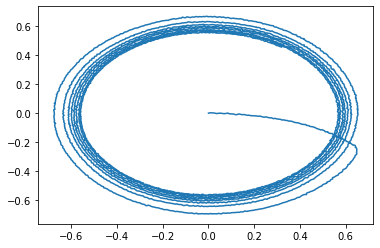

In [8]:
# YOUR CODE HERE
# plot the Phase plot for your neuron population, using the decoded_output of the neurons. This is a [n_time,2] vector
# Please look at #https://www.nengo.ai/nengo/examples/dynamics/oscillator.html
phaseData = sim.data[neuron_probe]
plt.figure()
plt.plot(phaseData[:, 0], phaseData[:, 1])